<a href="https://colab.research.google.com/github/SinghTanmay024/KAG-energy-dataset-or-Appliances-energy-prediction-Data-Set/blob/main/KAG_energydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pprint
from  sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('/content/KAG_energydata_complete.csv')

In [3]:
dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
dataset.head(4)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389


In [5]:
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
dataset.shape

(19735, 29)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
dataset["Month"] = pd.to_datetime(dataset["date"]).dt.month
dataset["Date"] = pd.to_datetime(dataset["date"]).dt.date
dataset["Time"] = pd.to_datetime(dataset["date"]).dt.time
dataset["Week"] = pd.to_datetime(dataset["date"]).dt.week
dataset["Day"] = pd.to_datetime(dataset["date"]).dt.day_name()
dataset = dataset.set_index("date")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Date,Time,Week,Day
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,...,7.0,63.0,5.3,13.275433,13.275433,1,2016-01-11,17:00:00,2,Monday


In [11]:
dataset['INT'] = dataset['T1'] + dataset['T2'] + dataset['T3'] + dataset['T4'] + dataset['T5'] + dataset['T6']+ dataset['T8'] + dataset['T9']
dataset['INT'] = dataset['INT']/9

Text(0.5, 1.0, 'Mean Energy Consumption per Month')

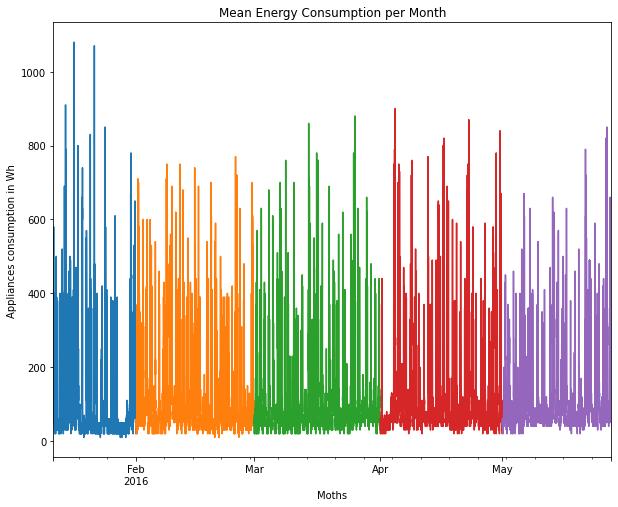

In [12]:
dataset.groupby('Month')['Appliances'].plot(figsize=(10,8))
plt.xlabel('Moths')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Month')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to month')

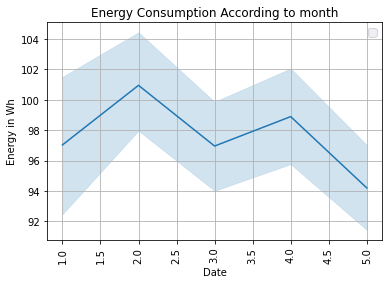

In [13]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"], y=dataset["Appliances"], data=dataset)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionn in Months")
plt.xlabel("Date")
plt.ylabel("Energy in Wh")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to month")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Temp According to month')

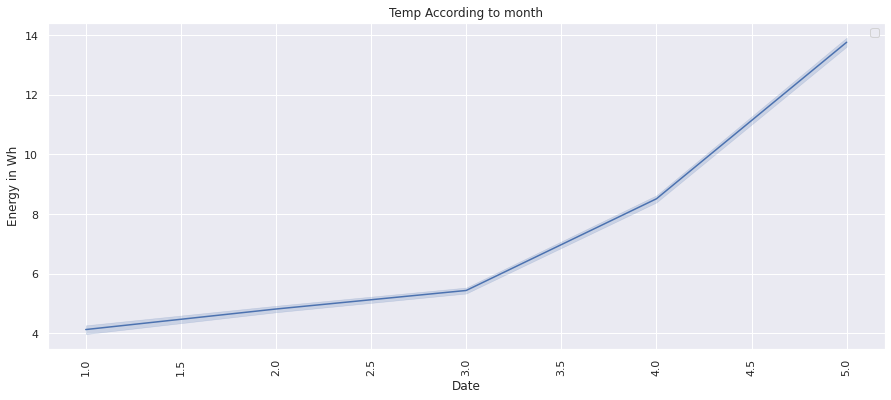

In [14]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"], y=dataset["T_out"], data=dataset)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Temp in Months")
plt.xlabel("Date")
plt.ylabel("Energy in Wh")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Temp According to month")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Temp According to month')

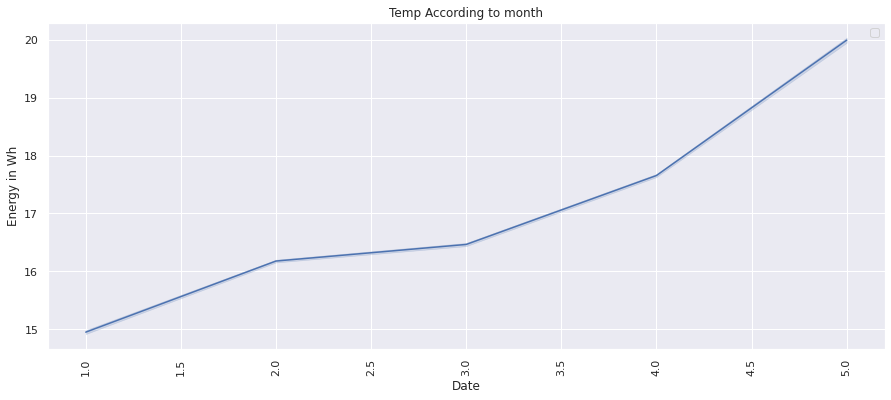

In [15]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"], y=dataset["INT"], data=dataset)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Temp in Months")
plt.xlabel("Date")
plt.ylabel("Energy in Wh")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Temp According to month")

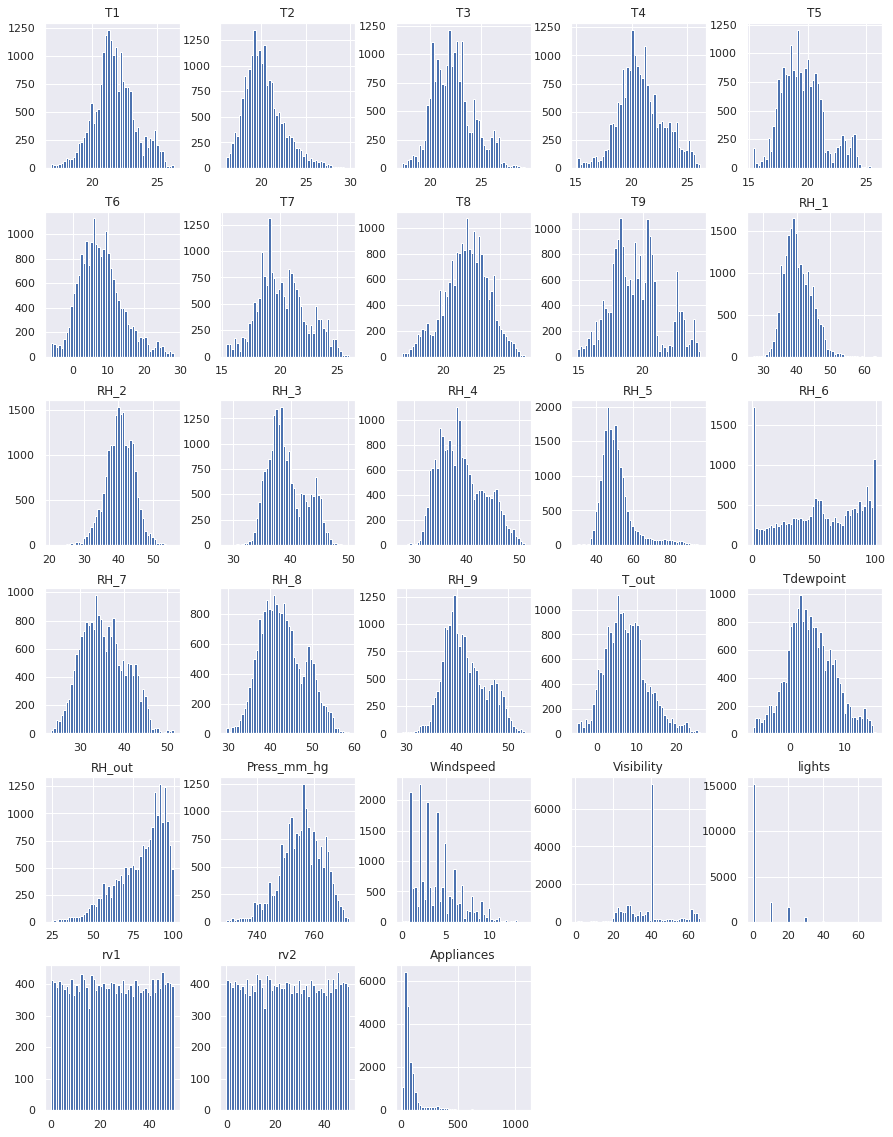

In [16]:
temp_cols = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
humidity_cols = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather_cols = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
light_cols = ["lights"]
random_cols = ["rv1", "rv2"]
date_time_cols = ['month', 'weekday', 'hour', 'week']
target = ["Appliances"]

dataset[temp_cols+ humidity_cols+ weather_cols+ light_cols+ random_cols+ target].hist(bins=50, figsize=(15,20));

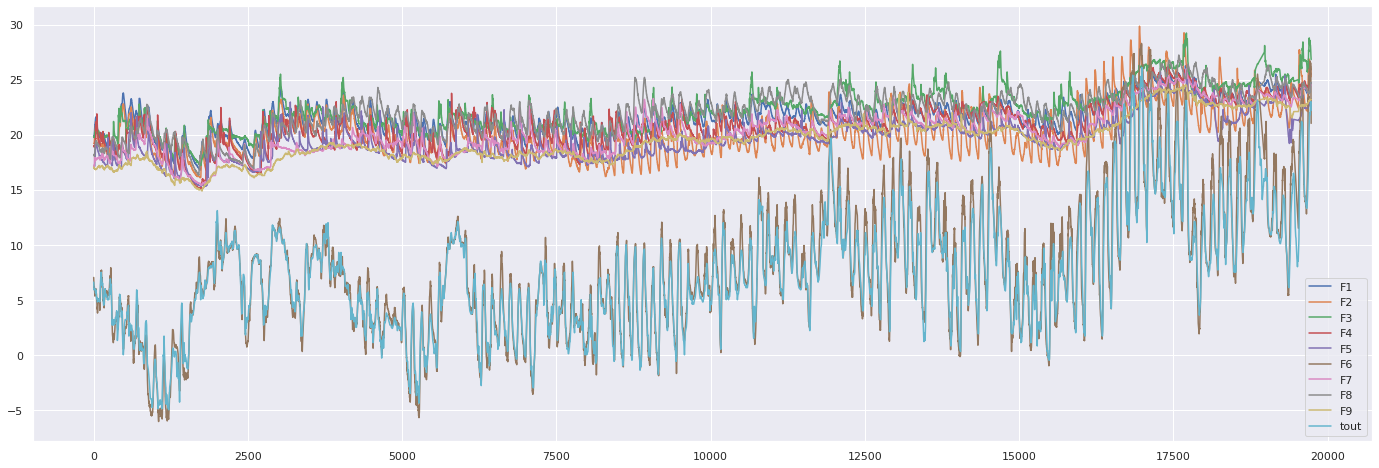

In [17]:
F1 = dataset["T1"].to_list()
F2 = dataset["T2"].to_list()
F3 = dataset["T3"].to_list()
F4 = dataset["T4"].to_list()
F5 = dataset["T5"].to_list()
F6 = dataset["T6"].to_list()
F7 = dataset["T7"].to_list()
F8 = dataset["T8"].to_list()
F9 = dataset["T9"].to_list()
tout = dataset["T_out"].to_list()


Df = pd.DataFrame(data={
    "F1":F1,
    "F2":F2,
    "F3":F3,
    "F4":F4,
    "F5":F5,
    "F6":F6,
    "F7":F7,
    "F8":F8,
    "F9":F9,
    "tout":tout,
})
Df.plot(figsize=(24, 8))

              F1         F2         F3         F4         F5         F6  \
0      47.596667  47.596667  47.596667  47.596667  47.596667  47.596667   
1      46.693333  46.693333  46.693333  46.693333  46.693333  46.693333   
2      46.300000  46.300000  46.300000  46.300000  46.300000  46.300000   
3      46.066667  46.066667  46.066667  46.066667  46.066667  46.066667   
4      46.333333  46.333333  46.333333  46.333333  46.333333  46.333333   
...          ...        ...        ...        ...        ...        ...   
19730  46.560000  46.560000  46.560000  46.560000  46.560000  46.560000   
19731  46.500000  46.500000  46.500000  46.500000  46.500000  46.500000   
19732  46.596667  46.596667  46.596667  46.596667  46.596667  46.596667   
19733  46.990000  46.990000  46.990000  46.990000  46.990000  46.990000   
19734  46.600000  46.600000  46.600000  46.600000  46.600000  46.600000   

              F7         F8         F9     RH_out  
0      47.596667  47.596667  47.596667  92.0000

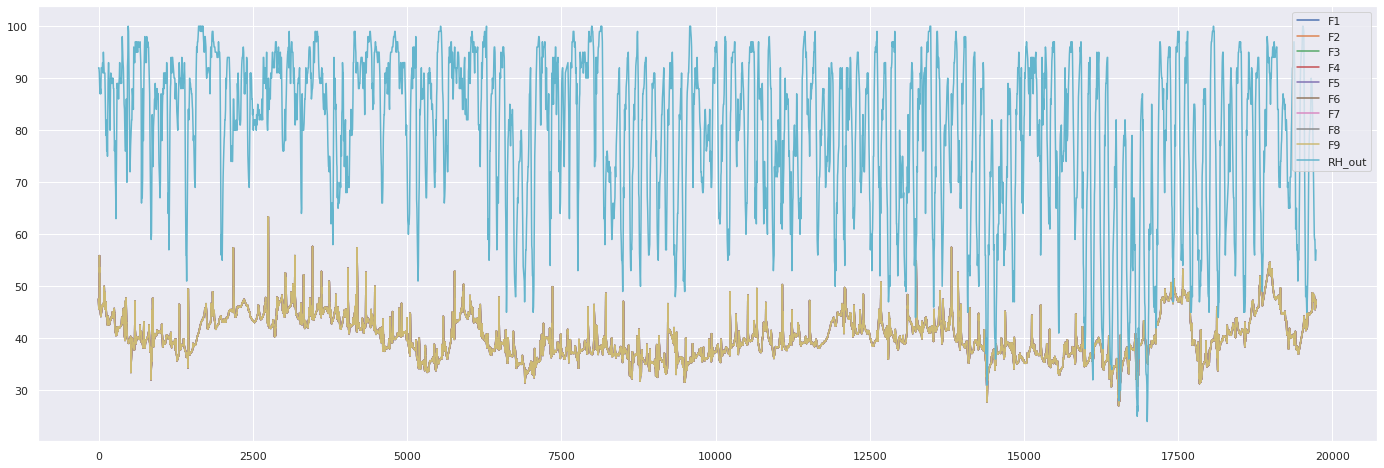

In [18]:
F1 = dataset["RH_1"].to_list()
F2 = dataset["RH_1"].to_list()
F3 = dataset["RH_1"].to_list()
F4 = dataset["RH_1"].to_list()
F5 = dataset["RH_1"].to_list()
F6 = dataset["RH_1"].to_list()
F7 = dataset["RH_1"].to_list()
F8 = dataset["RH_1"].to_list()
F9 = dataset["RH_1"].to_list()
rhout = dataset["RH_out"].to_list()


df = pd.DataFrame(data={
    "F1":F1,
    "F2":F2,
    "F3":F3,
    "F4":F4,
    "F5":F5,
    "F6":F6,
    "F7":F7,
    "F8":F8,
    "F9":F9,
    "RH_out":rhout,
})
print(df)
df.plot(figsize=(24, 8))

In [19]:
dataset.drop(['RH_2','RH_3', 'RH_4','RH_5', 'RH_6', 'RH_7','RH_8','RH_9','rv1', 'rv2'], axis = 1, inplace = True)

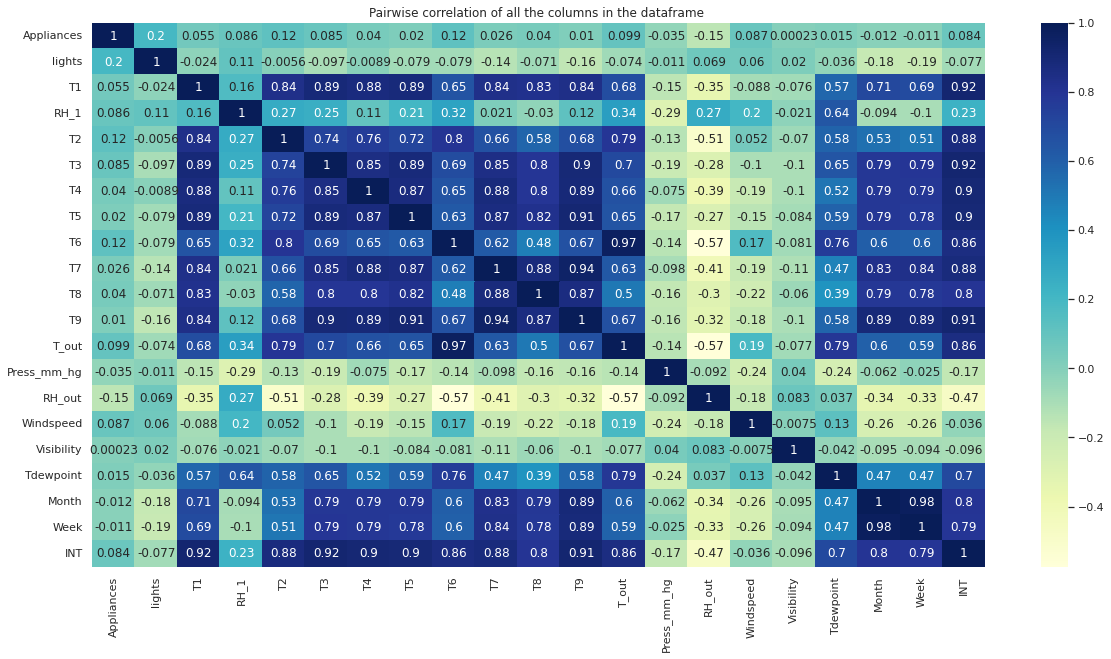

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(data= dataset.corr(), cmap="YlGnBu", annot= True)
plt.title("Pairwise correlation of all the columns in the dataframe ")
plt.show()

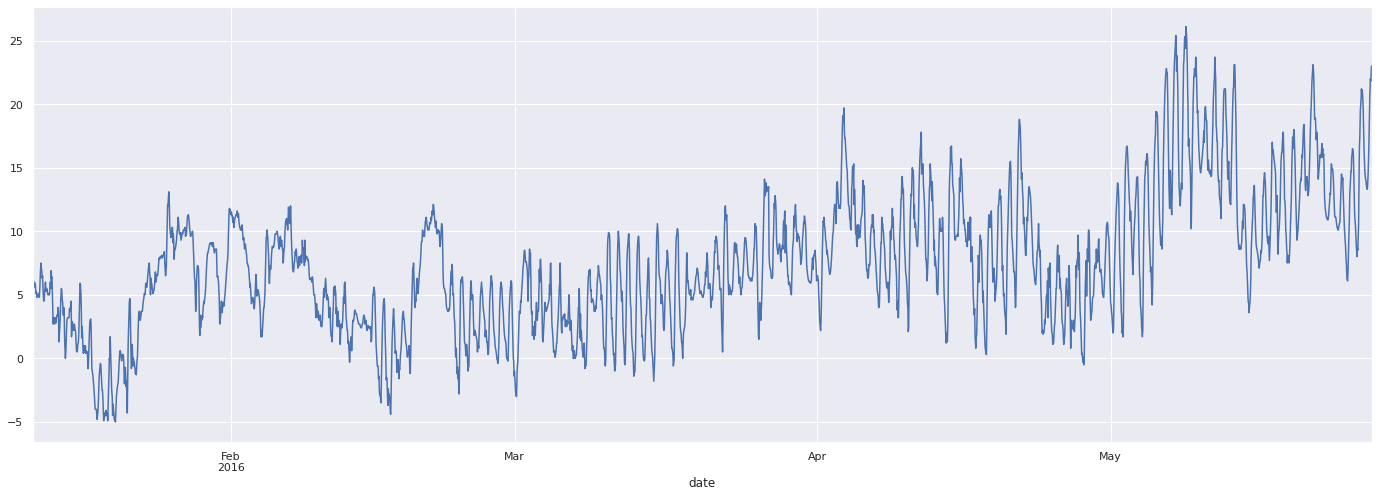

In [21]:
dataset['T_out'].plot(figsize=(24, 8))

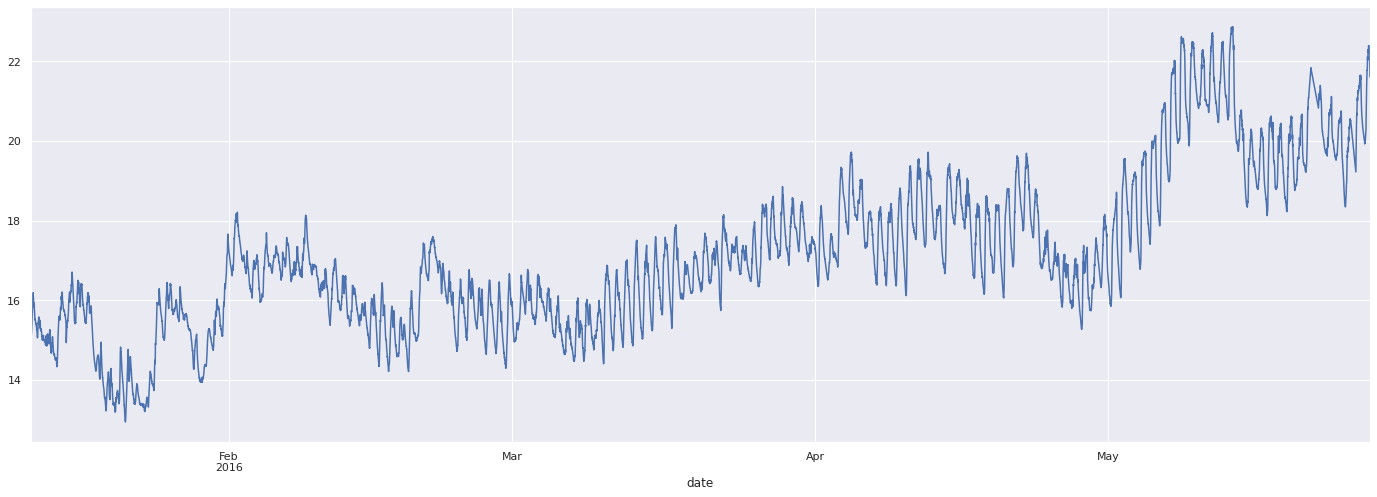

In [22]:
dataset['INT'].plot(figsize=(24, 8))

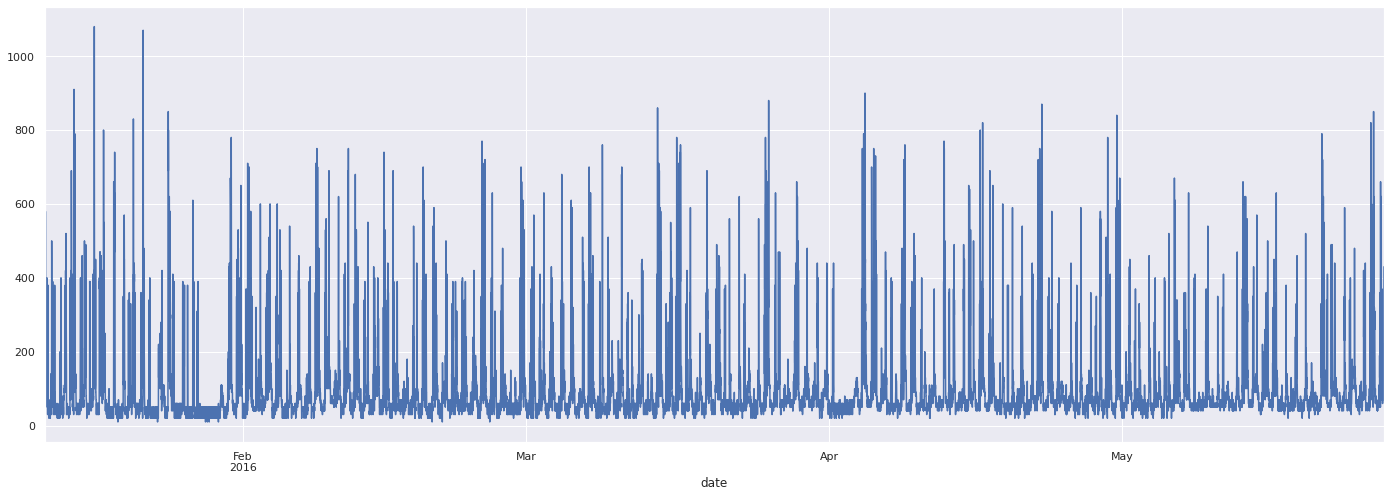

In [23]:
dataset['Appliances'].plot(figsize=(24, 8))

In [24]:
dataset = pd.read_csv('/content/KAG_energydata_complete.csv')
dataset = dataset.set_index("date")

In [25]:
dataset

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


# ***Models***

# LR

9622.64797732916
0.14643032890872854


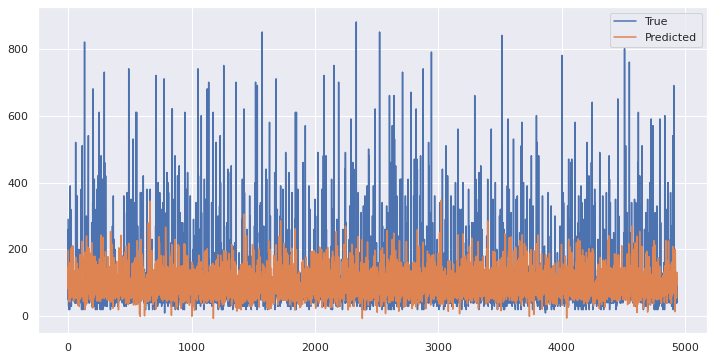

In [26]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rlr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

6462.1495743818405
0.42677993627709465


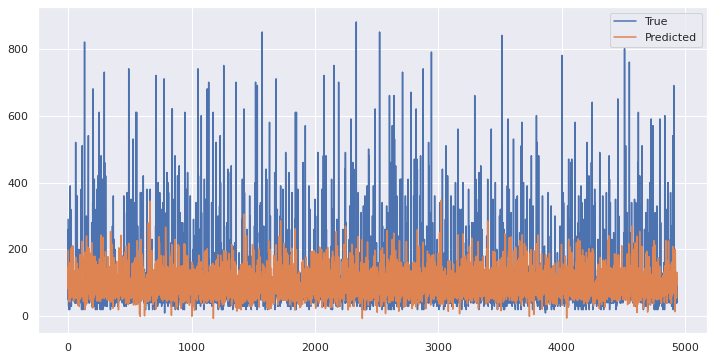

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
X_pred = regressor.predict(X_test)
rrf=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,X_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, X_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

6462.1495743818405
0.42677993627709465


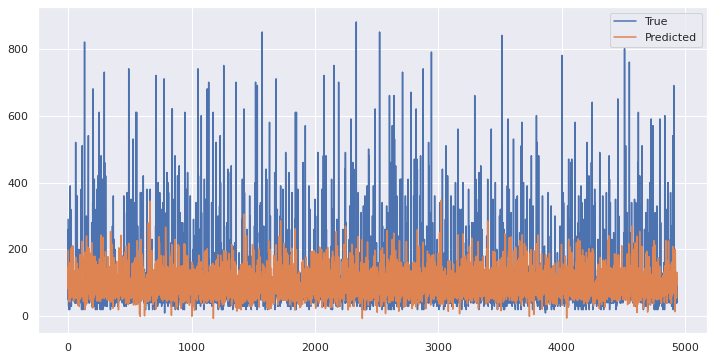

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
X_pred = regressor.predict(X_test)
rrf=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,X_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, X_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

11203.881170851968
0.006168240958122517


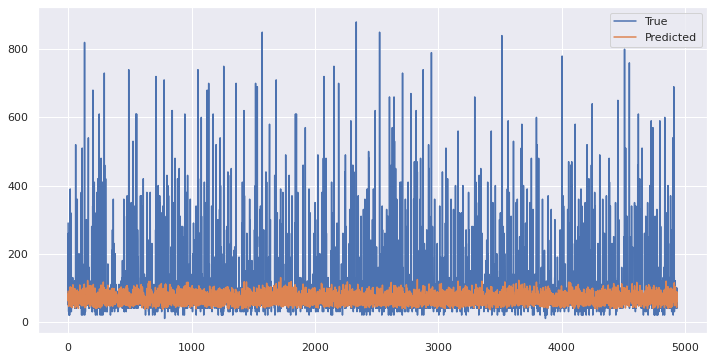

In [29]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rsvr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

10706.222132144305
0.05031270753178185


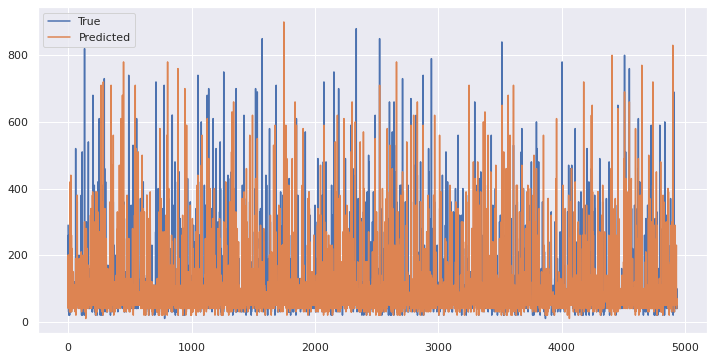

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rdt=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

[04:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
8514.752472843205
0.2447053571125608


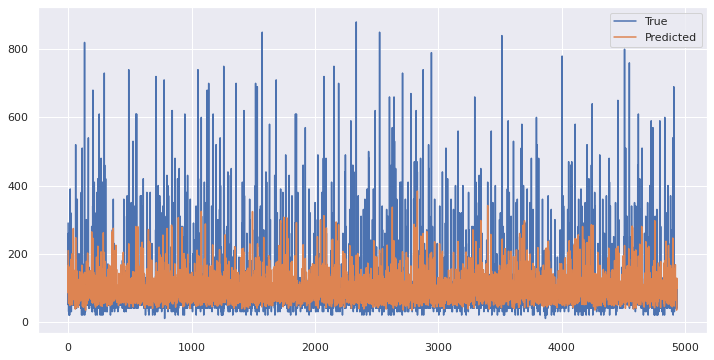

In [31]:
from xgboost import XGBRegressor
Regressor = XGBRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
rxg=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

Epoch 1/100
463/463 [==============================] - 1s 1ms/step - loss: 19662.6836
Epoch 2/100
463/463 [==============================] - 1s 2ms/step - loss: 19561.3477
Epoch 3/100
463/463 [==============================] - 1s 1ms/step - loss: 19473.6797
Epoch 4/100
463/463 [==============================] - 1s 1ms/step - loss: 19386.7637
Epoch 5/100
463/463 [==============================] - 1s 1ms/step - loss: 19300.6230
Epoch 6/100
463/463 [==============================] - 1s 1ms/step - loss: 19214.9258
Epoch 7/100
463/463 [==============================] - 1s 1ms/step - loss: 19129.7520
Epoch 8/100
463/463 [==============================] - 1s 1ms/step - loss: 19045.0469
Epoch 9/100
463/463 [==============================] - 1s 1ms/step - loss: 18960.8145
Epoch 10/100
463/463 [==============================] - 1s 1ms/step - loss: 18876.9355
Epoch 11/100
463/463 [==============================] - 1s 1ms/step - loss: 18793.4355
Epoch 12/100
463/463 [==============================

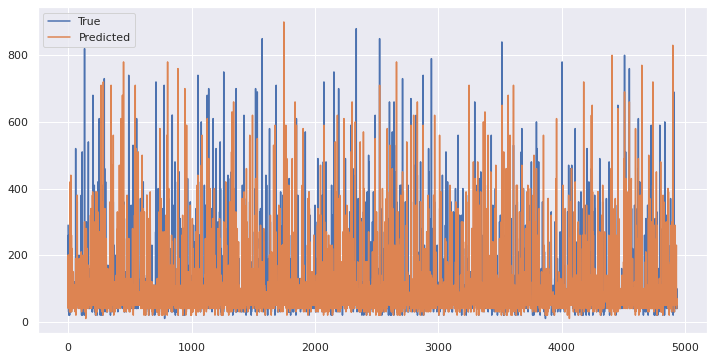

In [32]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
rann=mean_squared_error(y_test,y_pred)
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

# LSTM

In [33]:
dataset = dataset.drop(['Appliances','lights','T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9','rv1','rv2','T1','RH_1','Press_mm_hg'], axis=1)

In [34]:
dataset

,T_out,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,
2016-01-11 17:00:00,6.600000,92.000000,7.000000,63.000000,5.300000
2016-01-11 17:10:00,6.483333,92.000000,6.666667,59.166667,5.200000
2016-01-11 17:20:00,6.366667,92.000000,6.333333,55.333333,5.100000
2016-01-11 17:30:00,6.250000,92.000000,6.000000,51.500000,5.000000
2016-01-11 17:40:00,6.133333,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...
2016-05-27 17:20:00,22.733333,55.666667,3.333333,23.666667,13.333333
2016-05-27 17:30:00,22.600000,56.000000,3.500000,24.500000,13.300000
2016-05-27 17:40:00,22.466667,56.333333,3.666667,25.333333,13.266667


(15844, 3, 1)


0.032183257745258494

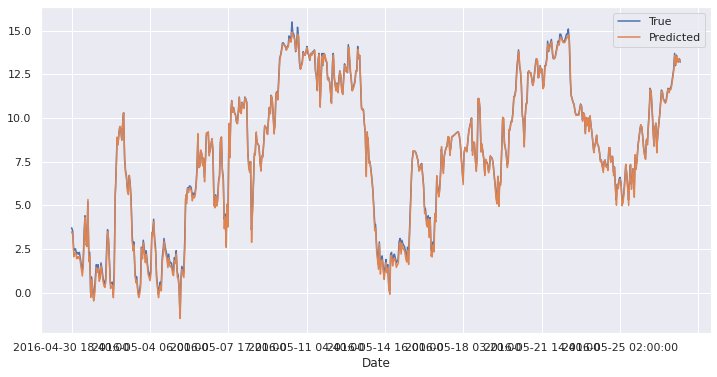

In [35]:
Training_Set = dataset.iloc[:15847,[-1]]
TestData = dataset.iloc[15847:,[-1]]
from sklearn.preprocessing import MinMaxScaler
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(Train)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return X_Train, Y_Train
 

raw_seq = Train

n_steps = 3

X_Train, Y_Train = split_sequence(raw_seq, n_steps)
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
print(X_Train.shape)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1,)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32, verbose=0)

Test = sc.fit_transform(TestData)
def xtest(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(Test)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return X_Test, Y_Test
 

raw_seq = Test

n_steps = 3

X_Test, Y_Test = xtest(raw_seq, n_steps)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = np.reshape(X_Test, newshape=(X_Test.shape[0], X_Test.shape[1], 1))
X_pred = regressor.predict(X_Test)
X_pred = sc.inverse_transform(X_pred)
Y_Test = sc.inverse_transform(Y_Test)
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))
from sklearn.metrics import r2_score
r2_score(Machine_Df['True'],Machine_Df['Predicted'])
mean_squared_error(Machine_Df['True'],Machine_Df['Predicted'])

In [36]:
r2_score(Machine_Df['True'],Machine_Df['Predicted'])

0.9981222981531169

In [37]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
models = [
           ['AdaBoostRegressor: ',AdaBoostRegressor()]
         ]

In [38]:
dataset = pd.read_csv('/content/KAG_energydata_complete.csv')
dataset = dataset.set_index("date")
dataset

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [39]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:, 0].values
RegModel = AdaBoostRegressor(n_estimators=50,learning_rate=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

In [41]:
r2_score(y_test,prediction)

-1.384599699059328